In [1]:
import pandas as pd

# Open the zip into the dataset folder if this does not work for you

df = pd.read_csv("dataset/Impact_of_Remote_Work_on_Mental_Health.csv")
df

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


# Preprocessing


In [2]:
from sklearn.preprocessing import LabelEncoder

# Drop selected features
columns_drop = ['Employee_ID', 'Region', 'Industry','Age','Productivity_Change']
df = df.drop(columns_drop, axis=1, errors='ignore')

# Fill null values
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna('Not Specified')
df['Physical_Activity'] = df['Physical_Activity'].fillna('None')


# Encode target variables
target_enc = LabelEncoder().fit(df['Mental_Health_Condition'].unique())
df['Mental_Health_Condition'] = target_enc.transform(df['Mental_Health_Condition'])
targets_df = df['Mental_Health_Condition']
targets = target_enc.inverse_transform(df['Mental_Health_Condition'])

df = df.drop('Mental_Health_Condition', axis=1)

targets

array(['Depression', 'Anxiety', 'Anxiety', ..., 'Burnout',
       'Not Specified', 'Depression'], dtype=object)

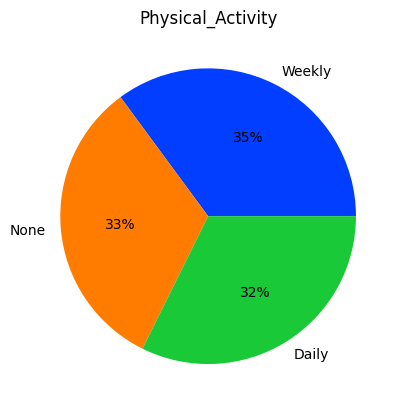

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_pie_chart(features, data):
    for feature in features:
        keys = data[feature].unique()
        tempData = data[feature].value_counts(dropna=False)

        # define Seaborn color palette to use 
        palette_color = sns.color_palette('bright') 

        # plotting data on chart 
        plt.pie(tempData, labels=keys, colors=palette_color, autopct='%.0f%%') 
        plt.title(feature)
    
        # displaying chart 
        plt.show() 

generate_pie_chart(['Physical_Activity'], df)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# for column in df.columns:
#     contingency_table = pd.crosstab(df[column], targets)
#     sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
#     plt.title(f'{column} vs Mental Health Condition')
#     plt.show()

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Example usage
max_corr = 0
for feature in df.columns:
    if feature == 'Mental_Health_Condition':
        continue
    cramers_v_value = cramers_v(df[feature], targets_df)
    max_corr = max(max_corr, cramers_v_value)
    print(f"Cramér's V {feature}: {cramers_v_value}")

print(f"Max: {max_corr}")

Cramér's V Gender: 0.026155669689276708
Cramér's V Job_Role: 0.058470064854098974
Cramér's V Years_of_Experience: 0.07944372697263816
Cramér's V Work_Location: 0.021403145130194947
Cramér's V Hours_Worked_Per_Week: 0.08683642045141256
Cramér's V Number_of_Virtual_Meetings: 0.06213103731750508
Cramér's V Work_Life_Balance_Rating: 0.025291589796847026
Cramér's V Stress_Level: 0.01719463891560119
Cramér's V Access_to_Mental_Health_Resources: 0.025023038462892916
Cramér's V Social_Isolation_Rating: 0.02167614311125698
Cramér's V Satisfaction_with_Remote_Work: 0.019007889258483044
Cramér's V Company_Support_for_Remote_Work: 0.03447683488947153
Cramér's V Physical_Activity: 0.027959671459359174
Cramér's V Sleep_Quality: 0.025974665940680857
Max: 0.08683642045141256


# One Hot Encoding

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Columns to be encoded via one hot encoding
columns = ['Gender', 'Job_Role', 'Work_Location', 'Physical_Activity',]
df_encoded = pd.get_dummies(df, columns=columns, drop_first=True)

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[columns])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(columns))

df_encoded = pd.concat([df.drop(columns, axis=1), one_hot_df], axis=1)

In [7]:
# Preprocessing 

# manual mapping
columns = ['Stress_Level', 'Access_to_Mental_Health_Resources', 'Satisfaction_with_Remote_Work']

mappings = {
    'Stress_Level': {
        'Low': 1,
        'Medium': 2,
        'High': 3,
    },
    'Access_to_Mental_Health_Resources': {
        'No': 0,
        'Yes': 1,
    },
    'Satisfaction_with_Remote_Work': {
        'Unsatisfied': -1,
        'Neutral': 0,
        'Satisfied': 1,
    },
    'Sleep_Quality': {
        'Good': 1,
        'Average':0,
        'Poor': -1,
    },
}

# Map values to dataframe
for column, mapping in mappings.items():
    if column in df_encoded.columns:
        df_encoded[column] = df_encoded[column].map(mapping)

In [8]:
# Minmax scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
columns = ['Years_of_Experience', 'Hours_Worked_Per_Week', 
           'Number_of_Virtual_Meetings']


df_encoded[columns] = scaler.fit_transform(df[columns])

columns = ['Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work']

scaler = MinMaxScaler()
df_encoded[columns] = scaler.fit_transform(df[columns])

df_encoded

,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Sleep_Quality,...,Job_Role_Marketing,Job_Role_Project Manager,Job_Role_Sales,Job_Role_Software Engineer,Work_Location_Hybrid,Work_Location_Onsite,Work_Location_Remote,Physical_Activity_Daily,Physical_Activity_None,Physical_Activity_Weekly
0,-0.480088,0.622767,-0.120587,0.25,2,0,0.00,-1,0.00,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.478151,1.044388,-0.767744,0.00,2,0,0.50,1,0.25,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.418168,0.538443,0.742290,1.00,2,0,0.75,-1,1.00,-1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.218556,-0.642094,0.095132,0.75,3,1,0.50,-1,0.50,-1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.416231,-0.389122,0.958009,0.25,3,1,0.50,-1,0.50,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.378345,-1.316687,-1.199183,1.00,3,1,0.75,0,0.00,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4996,0.917200,0.707091,1.605166,0.00,1,1,0.00,1,0.00,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4997,0.318362,-0.473446,-1.414902,0.75,3,0,0.50,1,0.00,-1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4998,0.817393,1.550332,-1.630621,1.00,1,1,0.50,-1,0.75,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


# SVM Model

In [10]:
# SVM models
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# Reusable function to display the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)

    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Depression', 'Anxiety', 'Burnout', 'No Condition'], yticklabels=['Depression', 'Anxiety', 'Burnout', 'No Condition'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.grid(False)
    plt.show()

In [11]:
linear_param_grid = {
    'C': [0.1, 1, 10, 100],
    'decision_function_shape': ['ovo', 'ovr'],
    'kernel': ['linear'],
}

poly_param_grid = {
    'kernel': ['poly'],
    'C': [0.1, 1, 10, 100],
    'decision_function_shape': ['ovo', 'ovr'],
    # 'degree': [2, 3],
    'degree': [2, 3, 4, 5],  # Degree of the polynomial
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
    'coef0': [0, 0.1, 1, 10]  # Independent term in the kernel function
}

rbf_param_grid = {
    'kernel': ['rbf'],
    'decision_function_shape': ['ovo', 'ovr'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Kernel coefficient
}

sigmoid_param_grid = {
    'kernel': ['sigmoid'],
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
    'coef0': [0, 0.1, 1, 10],  # Independent term in the kernel function
    'decision_function_shape': ['ovo', 'ovr'],
}

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, targets_df, stratify=targets_df, train_size=0.8, random_state=42, shuffle=True)

In [24]:
param_grids = {
    'linear': linear_param_grid,
    # 'poly': poly_param_grid, DO NOT UNCOMMENT THIS, IT WILL INCREASE TRAINING TIME BY AN HOUR
    'rbf': rbf_param_grid,
    'sigmoid': sigmoid_param_grid,
}

results = {}
for kernel, param_grid in param_grids.items():
    print(f'Currently on {kernel} kernel')

    grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
    grid_search.fit(X=X_train, y=y_train)
    
    results[kernel] = {'best_params': grid_search.best_params_, 'best_score': grid_search.best_score_}
    
    print(f'Best accuracy score found: {grid_search.best_score_}')

'''
Kernel: linear
Best Params: {'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'linear'}
Best Accuracy Score: 0.27825
Kernel: rbf
Best Params: {'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score: 0.26525
Kernel: sigmoid
Best Params: {'C': 0.1, 'coef0': 0, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Accuracy Score: 0.25649999999999995
'''

for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")
    print(f"Best Params: {metrics['best_params']}")
    print(f"Best Accuracy Score: {metrics['best_score']}")

Currently on linear kernel
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best accuracy score found: 0.278
Currently on rbf kernel
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best accuracy score found: 0.26000000000000006
Currently on sigmoid kernel
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best accuracy score found: 0.268
Kernel: linear
Best Params: {'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'linear'}
Best Accuracy Score: 0.278
Kernel: rbf
Best Params: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}
Best Accuracy Score: 0.26000000000000006
Kernel: sigmoid
Best Params: {'C': 100, 'coef0': 1, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'sigmoid'}
Best Accuracy Score: 0.268


Kernel: linear


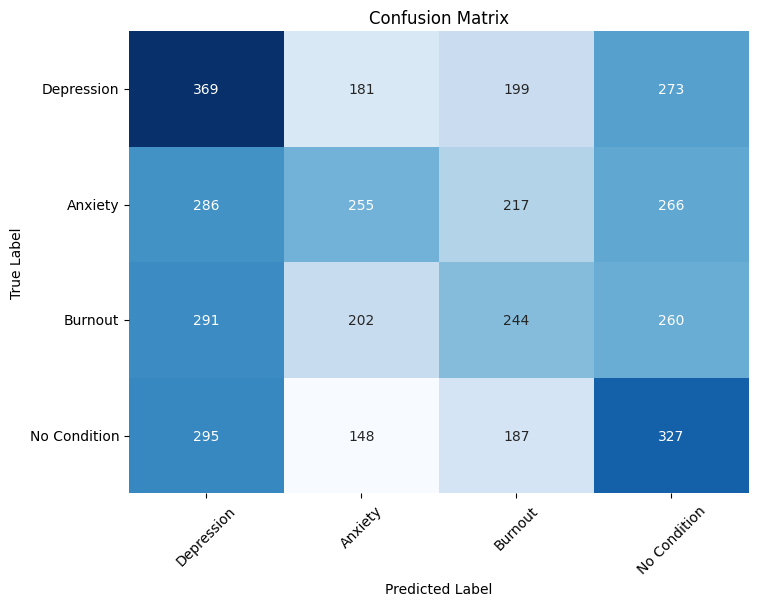

              precision    recall  f1-score   support

           0       0.30      0.36      0.33      1022
           1       0.32      0.25      0.28      1024
           2       0.29      0.24      0.26       997
           3       0.29      0.34      0.31       957

    accuracy                           0.30      4000
   macro avg       0.30      0.30      0.30      4000
weighted avg       0.30      0.30      0.30      4000

Kernel: rbf


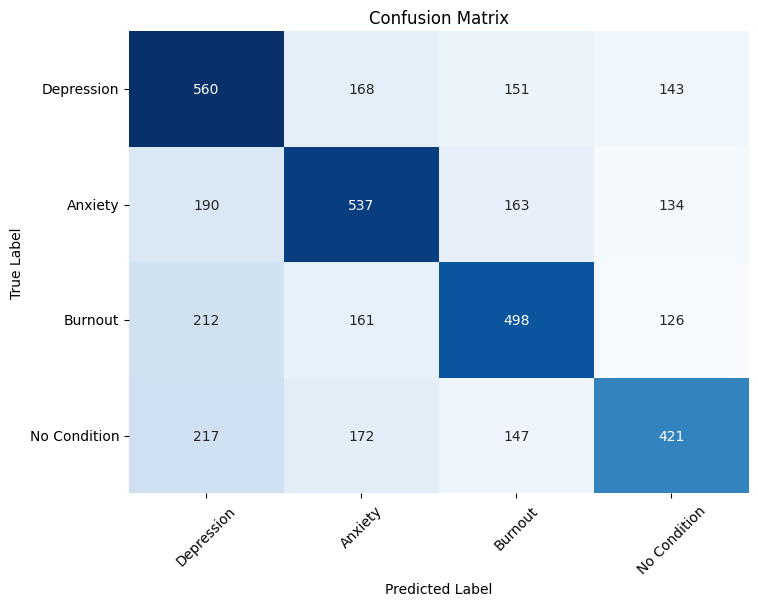

              precision    recall  f1-score   support

           0       0.47      0.55      0.51      1022
           1       0.52      0.52      0.52      1024
           2       0.52      0.50      0.51       997
           3       0.51      0.44      0.47       957

    accuracy                           0.50      4000
   macro avg       0.51      0.50      0.50      4000
weighted avg       0.51      0.50      0.50      4000

Kernel: sigmoid


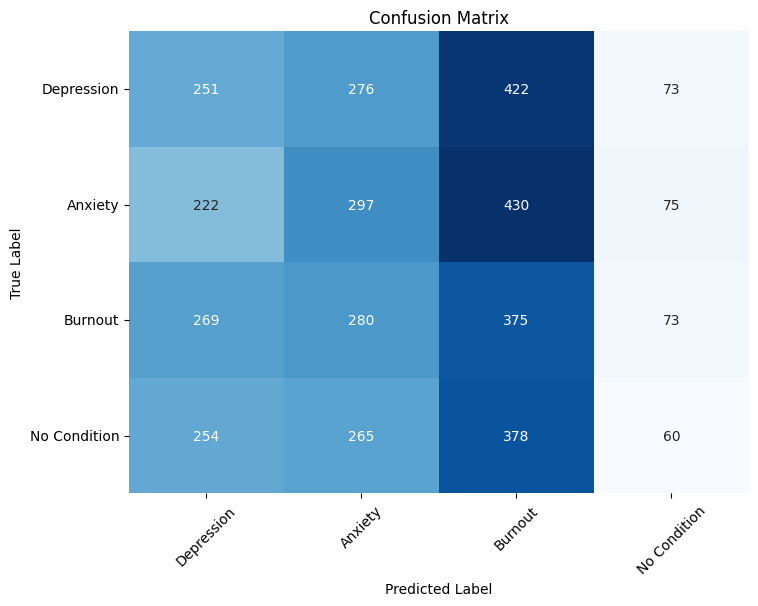

              precision    recall  f1-score   support

           0       0.25      0.25      0.25      1022
           1       0.27      0.29      0.28      1024
           2       0.23      0.38      0.29       997
           3       0.21      0.06      0.10       957

    accuracy                           0.25      4000
   macro avg       0.24      0.24      0.23      4000
weighted avg       0.24      0.25      0.23      4000



In [32]:
from sklearn.metrics import classification_report, confusion_matrix
# Testing on train set
test_results = {}
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")

    best_model = SVC(**metrics['best_params'])
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_train)

    plot_confusion_matrix(y_true=y_train, y_pred=y_pred)
    print(classification_report(y_true=y_train, y_pred=y_pred))
    test_results[kernel] = best_model.score(X_train, y_train)

sorted_test_results = sorted(test_results, key=lambda item: item[1])

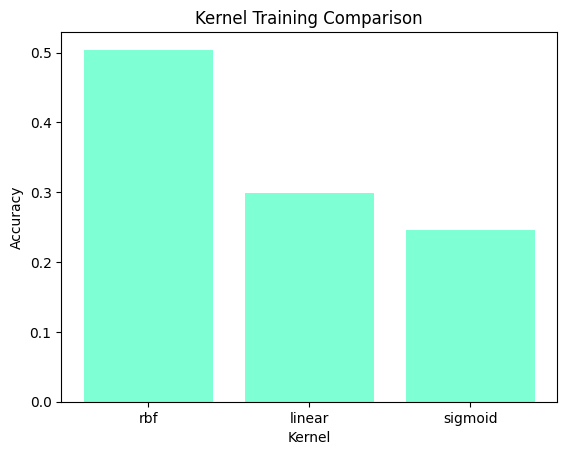

In [33]:
import matplotlib.pyplot as plt

# Visualize the test_results
kernels = sorted_test_results
score_results = [test_results[kernel] for kernel in kernels]

plt.bar(kernels, score_results, color='aquamarine')
plt.title('Kernel Training Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()

Kernel: linear


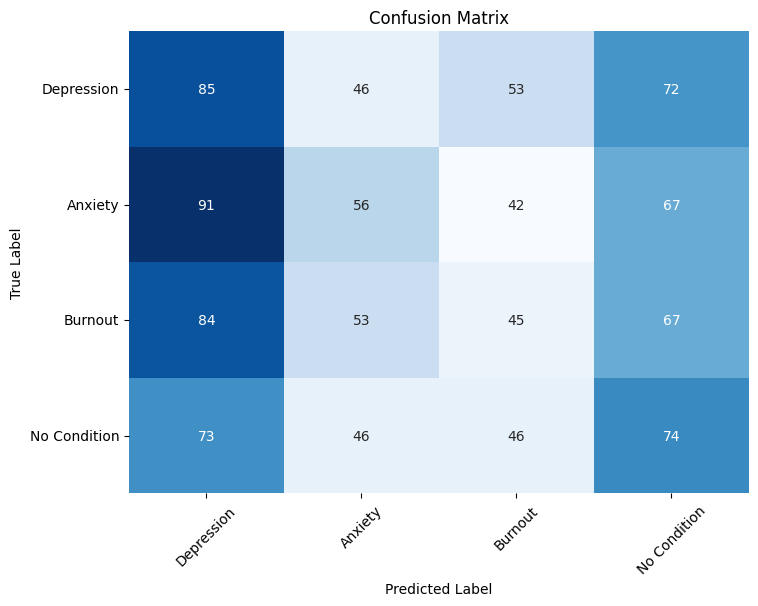

              precision    recall  f1-score   support

           0       0.26      0.33      0.29       256
           1       0.28      0.22      0.25       256
           2       0.24      0.18      0.21       249
           3       0.26      0.31      0.29       239

    accuracy                           0.26      1000
   macro avg       0.26      0.26      0.26      1000
weighted avg       0.26      0.26      0.26      1000

Kernel: rbf


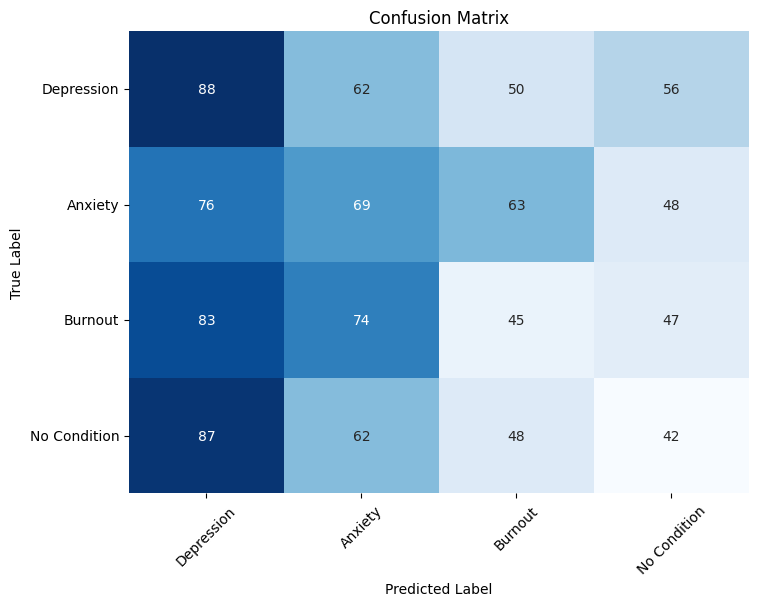

              precision    recall  f1-score   support

           0       0.26      0.34      0.30       256
           1       0.26      0.27      0.26       256
           2       0.22      0.18      0.20       249
           3       0.22      0.18      0.19       239

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.24      1000
weighted avg       0.24      0.24      0.24      1000

Kernel: sigmoid


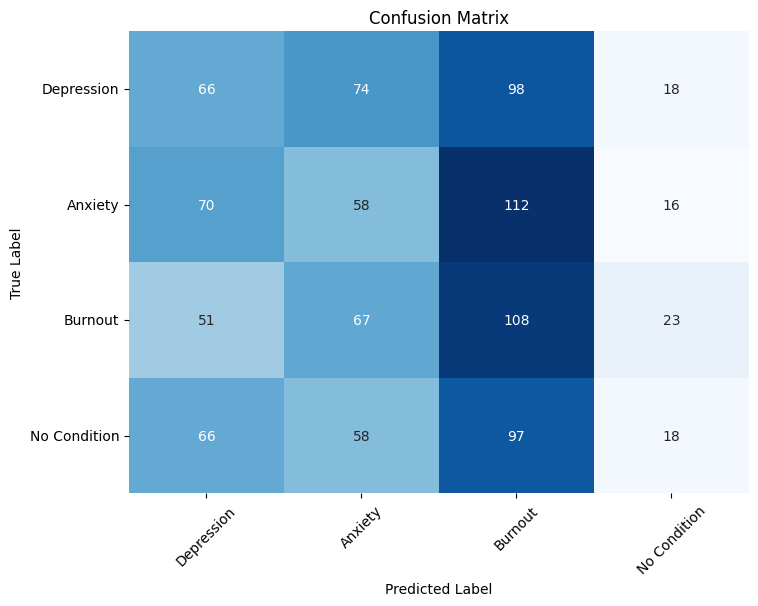

              precision    recall  f1-score   support

           0       0.26      0.26      0.26       256
           1       0.23      0.23      0.23       256
           2       0.26      0.43      0.33       249
           3       0.24      0.08      0.11       239

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.23      1000
weighted avg       0.25      0.25      0.23      1000



In [34]:
# Testing on test set
test_results = {}
for kernel, metrics in results.items():
    print(f"Kernel: {kernel}")

    best_model = SVC(**metrics['best_params'])
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    plot_confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(classification_report(y_true=y_test, y_pred=y_pred))
    test_results[kernel] = best_model.score(X_test, y_test)

sorted_test_results = sorted(test_results, key=lambda item: item[1])

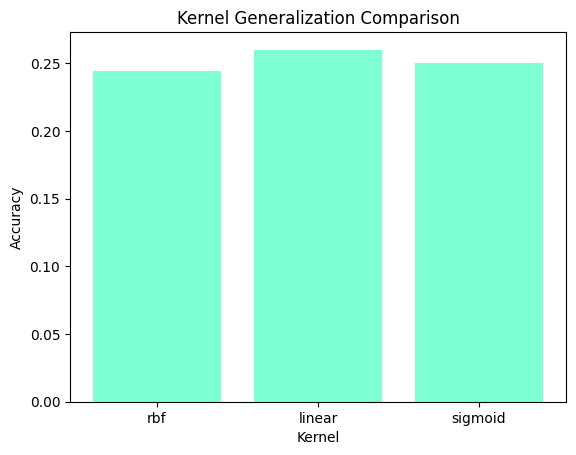

In [35]:
import matplotlib.pyplot as plt

# Visualize the test_results
kernels = sorted_test_results
score_results = [test_results[kernel] for kernel in kernels]

plt.bar(kernels, score_results, color='aquamarine')
plt.title('Kernel Generalization Comparison')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()

# Add Your Models Below Here and use the preprocessed data from above
Use the following: X_train, X_test, y_train, y_test

## Neural Network - Default Parameters


NN with default params training Set evaluation:
              precision    recall  f1-score   support

           0       0.57      0.52      0.55      1022
           1       0.52      0.53      0.53      1024
           2       0.51      0.58      0.54       997
           3       0.55      0.53      0.54       957

    accuracy                           0.54      4000
   macro avg       0.54      0.54      0.54      4000
weighted avg       0.54      0.54      0.54      4000


NN with default parameters gives warning that the model has not converged with the current number of iterations.


c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


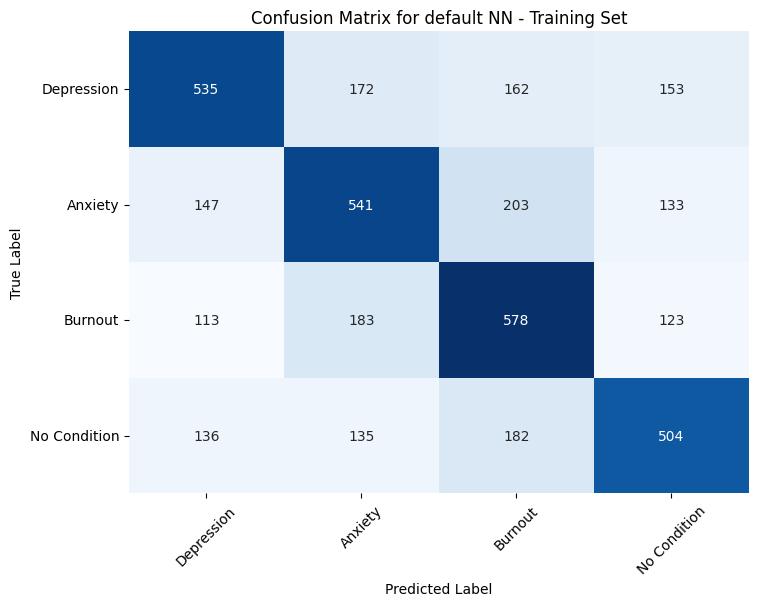


NN with default params test Set Evaluation:
              precision    recall  f1-score   support

           0       0.24      0.23      0.23       256
           1       0.24      0.26      0.25       256
           2       0.22      0.22      0.22       249
           3       0.20      0.19      0.20       239

    accuracy                           0.23      1000
   macro avg       0.23      0.23      0.23      1000
weighted avg       0.23      0.23      0.23      1000



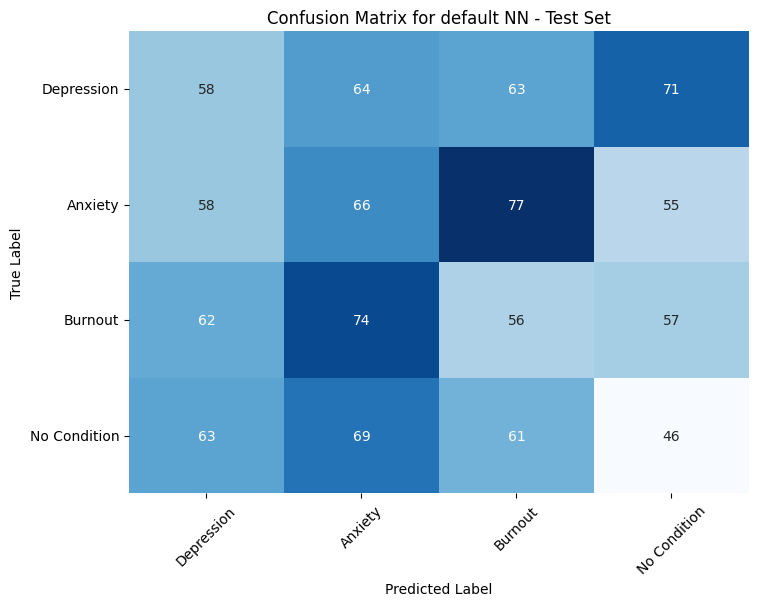

Default NN is performing poorly on testing splits, but well on training split.


In [16]:
## Neural Network (Mohand) ##
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Reusable function to display the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)

    # Create the plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Depression', 'Anxiety', 'Burnout', 'No Condition'], yticklabels=['Depression', 'Anxiety', 'Burnout', 'No Condition'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.grid(False)
    plt.show()

# NN with default params and train
default_NN = MLPClassifier()
default_NN.fit(X_train, y_train)

# Make predictions on both splits for evaluation
y_trainNN_pred = default_NN.predict(X_train)
y_testNN_pred = default_NN.predict(X_test)

# Evaluation of default NN
print("\nNN with default params training Set evaluation:")
print(classification_report(y_train, y_trainNN_pred))
print('\nNN with default parameters gives warning that the model has not converged with the current number of iterations.')
plot_confusion_matrix(y_train, y_trainNN_pred, title='Confusion Matrix for default NN - Training Set')
print("\nNN with default params test Set Evaluation:")
print(classification_report(y_test, y_testNN_pred))
plot_confusion_matrix(y_test, y_testNN_pred, title='Confusion Matrix for default NN - Test Set')
print('Default NN is performing poorly on testing splits, but well on training split.')


## Neural Network - Optimized Parameters


Optimized NN Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1022
           1       0.76      0.72      0.74      1024
           2       0.75      0.77      0.76       997
           3       0.77      0.80      0.78       957

    accuracy                           0.76      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.76      0.76      0.76      4000



c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


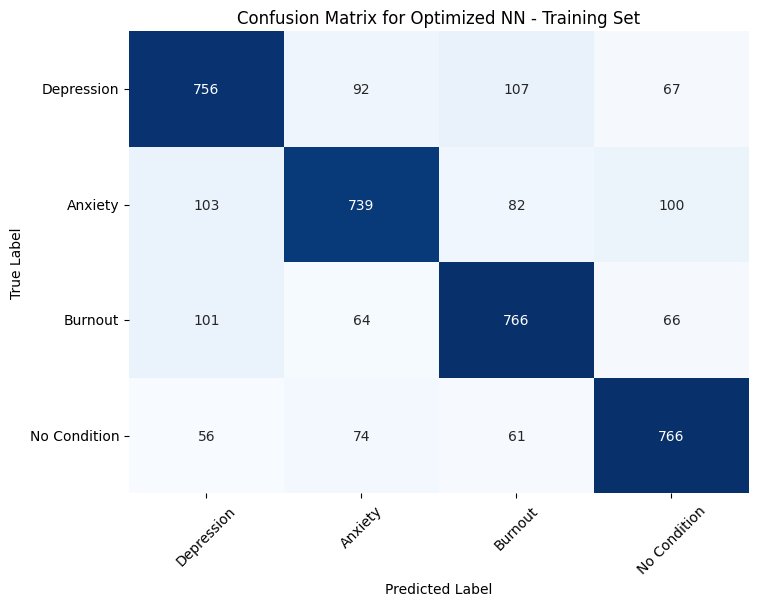


Optimized NN Test Set Evaluation:
              precision    recall  f1-score   support

  Depression       0.26      0.26      0.26       256
     Anxiety       0.21      0.18      0.20       256
     Burnout       0.25      0.27      0.26       249
No Condition       0.21      0.22      0.22       239

    accuracy                           0.23      1000
   macro avg       0.23      0.23      0.23      1000
weighted avg       0.23      0.23      0.23      1000



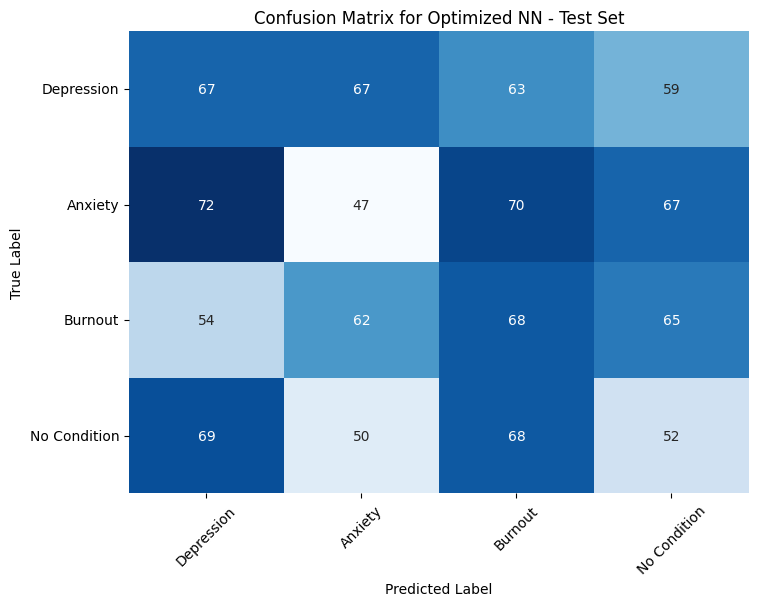


 Currently the optimized model is overfitting the training data and is performing poorly on the testing data, but is still outperforming the default model on the testing data.


In [17]:
# Tune parameters using gridsearchCV to get optimized model
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 800, 1000],
    'early_stopping': [True],
    'validation_fraction': [0.1, 0.2, 0.3]
}
# Get best paramaters, This will take awhile.
#grid_search = GridSearchCV(default_NN, param_grid, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring='f1_macro', verbose=0)
#grid_search.fit(X_trainNN, y_trainNN)
#print(grid_search.best_params_)

# Here is the output from the grid search: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
# Gers 100% accuracy on training, 0.24 on testing. overfits

# secondry: {'activation': 'tanh', 'alpha': 0.1, 'early_stopping': True, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam', 'validation_fraction': 0.2}
# does poorly on both training and testing

# Model using best parameters found from the gridsearch above.
#best_NN = MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate='constant', solver='adam', max_iter=500) .98 trainng, .26 testing
best_NN = MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(40, 40), learning_rate='constant', solver='adam', max_iter=1000)

best_NN.fit(X_train, y_train)

#Evaluate the optimized model on the training set
y_trainNN_pred = best_NN.predict(X_train)
print("\nOptimized NN Training Set Evaluation:")
print(classification_report(y_train, y_trainNN_pred))
plot_confusion_matrix(y_train, y_trainNN_pred, title='Confusion Matrix for Optimized NN - Training Set')

# Evaluate the optimized model on the test set
y_testNN_pred = best_NN.predict(X_test)
print("\nOptimized NN Test Set Evaluation:")
print(classification_report(y_test, y_testNN_pred, target_names=['Depression', 'Anxiety', 'Burnout', 'No Condition']))
plot_confusion_matrix(y_test, y_testNN_pred, title='Confusion Matrix for Optimized NN - Test Set')

print('\n Currently the optimized model is overfitting the training data and is performing poorly on the testing data, but is still outperforming the default model on the testing data.')
# Hopefully we can learn how to fix this whenever we do CA4 by learning other regularization techniques, if not, then an ensemble later may fix the overall model.


# KNN


Testing KNN with weights='uniform' and algorithm='ball_tree'
              precision    recall  f1-score   support

  Depression       0.24      0.33      0.28       256
     Anxiety       0.28      0.33      0.30       256
     Burnout       0.25      0.21      0.23       249
No Condition       0.22      0.12      0.16       239

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.24      1000
weighted avg       0.25      0.25      0.24      1000



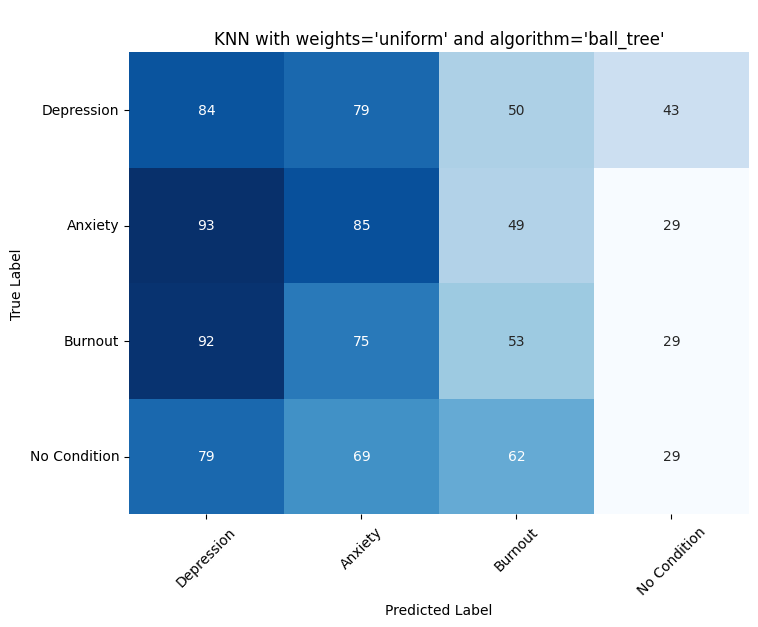


Testing KNN with weights='uniform' and algorithm='kd_tree'
              precision    recall  f1-score   support

  Depression       0.24      0.33      0.28       256
     Anxiety       0.28      0.33      0.30       256
     Burnout       0.25      0.21      0.23       249
No Condition       0.22      0.12      0.16       239

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.24      1000
weighted avg       0.25      0.25      0.24      1000



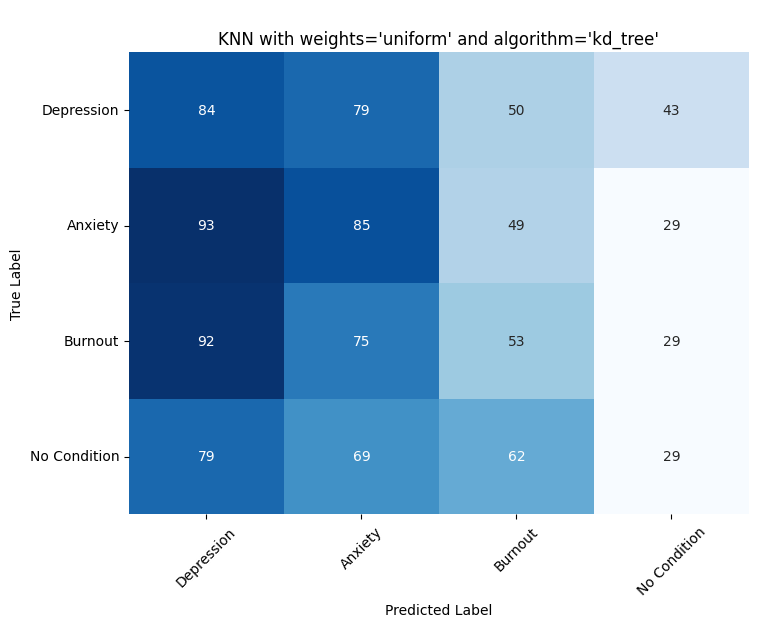


Testing KNN with weights='uniform' and algorithm='brute'
              precision    recall  f1-score   support

  Depression       0.24      0.33      0.28       256
     Anxiety       0.28      0.33      0.30       256
     Burnout       0.25      0.21      0.23       249
No Condition       0.22      0.12      0.16       239

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.24      1000
weighted avg       0.25      0.25      0.24      1000



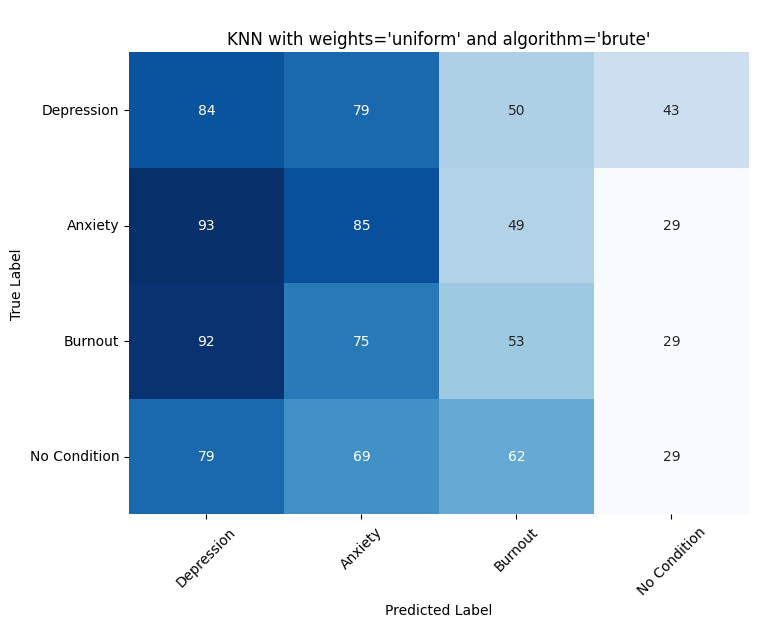


Testing KNN with weights='distance' and algorithm='ball_tree'
              precision    recall  f1-score   support

  Depression       0.23      0.24      0.24       256
     Anxiety       0.27      0.29      0.28       256
     Burnout       0.26      0.27      0.27       249
No Condition       0.20      0.17      0.19       239

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.24      1000
weighted avg       0.24      0.24      0.24      1000



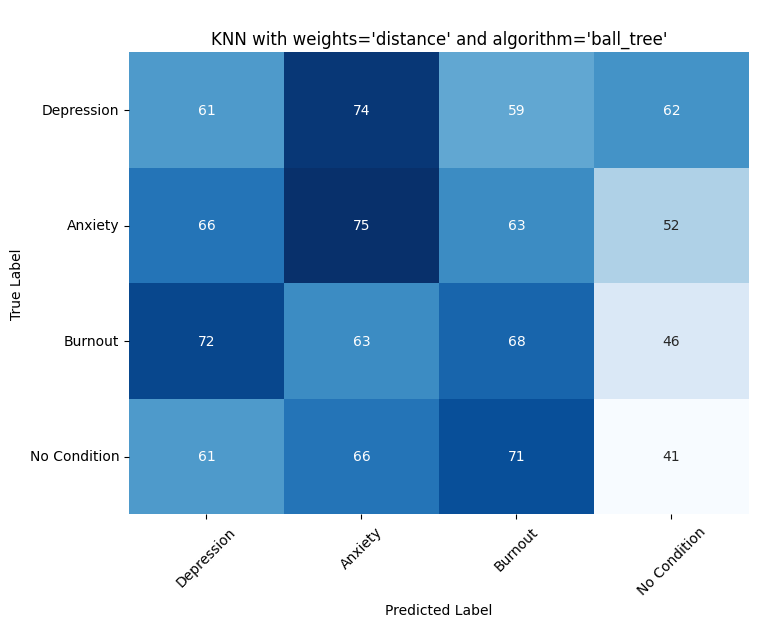


Testing KNN with weights='distance' and algorithm='kd_tree'
              precision    recall  f1-score   support

  Depression       0.23      0.24      0.24       256
     Anxiety       0.27      0.29      0.28       256
     Burnout       0.26      0.27      0.27       249
No Condition       0.20      0.17      0.19       239

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.24      1000
weighted avg       0.24      0.24      0.24      1000



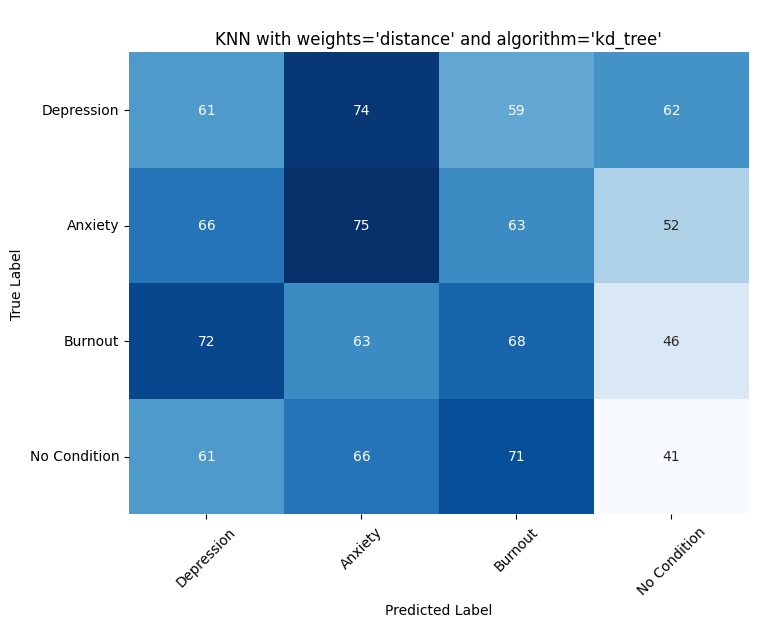


Testing KNN with weights='distance' and algorithm='brute'
              precision    recall  f1-score   support

  Depression       0.23      0.24      0.24       256
     Anxiety       0.27      0.29      0.28       256
     Burnout       0.26      0.27      0.27       249
No Condition       0.20      0.17      0.19       239

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.24      1000
weighted avg       0.24      0.24      0.24      1000



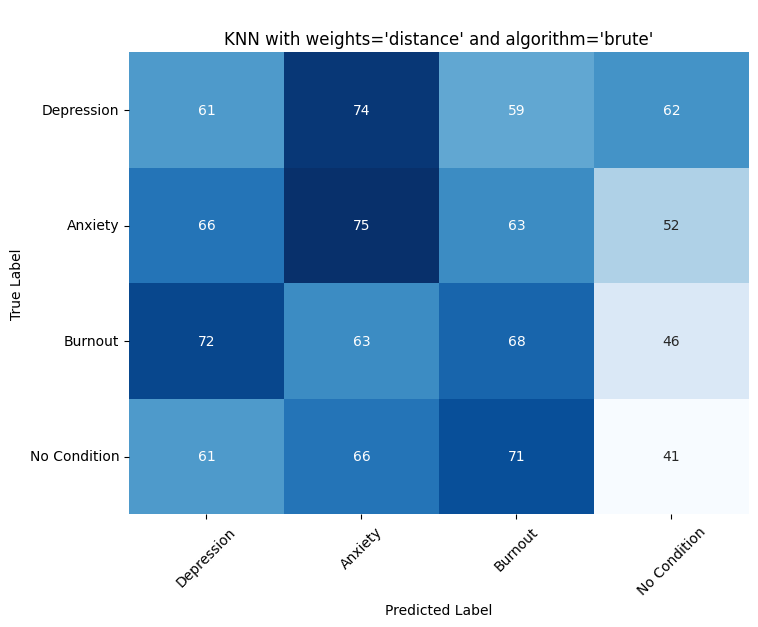

In [18]:
# KNN with distance weights and kd tree algorithm
from sklearn.neighbors import KNeighborsClassifier

# Define different weights and algorithms to test
weights_options = ['uniform', 'distance']
algorithms_options = ['ball_tree', 'kd_tree', 'brute']

# Evaluate different KNN configurations
def test_knn_combinations(X_train, X_test, y_train, y_test):
    for weight in weights_options:
        for algo in algorithms_options:
            print(f"\nTesting KNN with weights='{weight}' and algorithm='{algo}'")
            try:
                knn = KNeighborsClassifier(weights=weight, algorithm=algo)
                knn.fit(X_train, y_train)
                knnPredictions = knn.predict(X_test)
                print(classification_report(y_test, knnPredictions, target_names=['Depression', 'Anxiety', 'Burnout', 'No Condition']))
                plot_confusion_matrix(y_test, knnPredictions, title=f"\nKNN with weights='{weight}' and algorithm='{algo}'")
            except Exception as e:
                print(f"Error with weights='{weight}' and algorithm='{algo}': {e}")

# Run the tests
test_knn_combinations(X_train, X_test, y_train, y_test)

Logistic Regression CV Accuracy: 0.2635
Logistical Regression Training Set Evaluation
              precision    recall  f1-score   support

  Depression       0.32      0.32      0.32      1022
     Anxiety       0.31      0.31      0.31      1024
     Burnout       0.30      0.28      0.29       997
No Condition       0.31      0.32      0.32       957

    accuracy                           0.31      4000
   macro avg       0.31      0.31      0.31      4000
weighted avg       0.31      0.31      0.31      4000



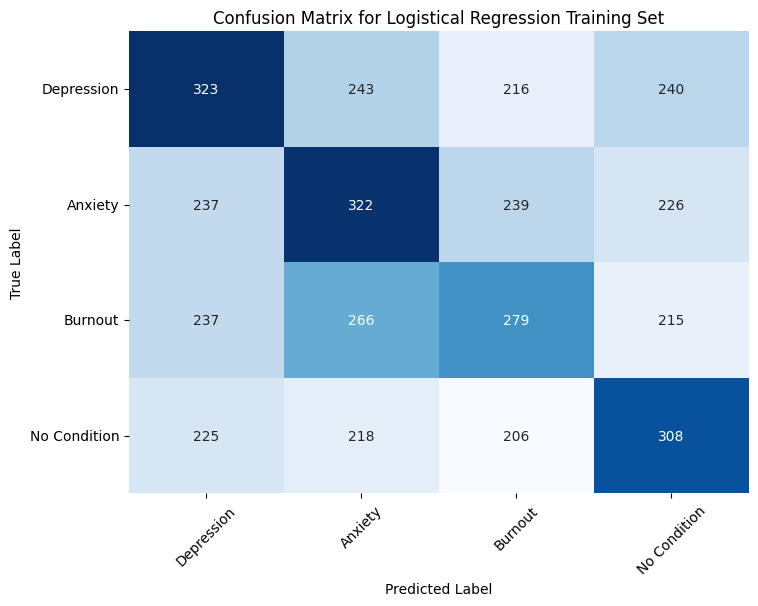

Logistical Regression Testing Set Evaluation
              precision    recall  f1-score   support

  Depression       0.25      0.28      0.27       256
     Anxiety       0.26      0.26      0.26       256
     Burnout       0.25      0.20      0.22       249
No Condition       0.26      0.28      0.27       239

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



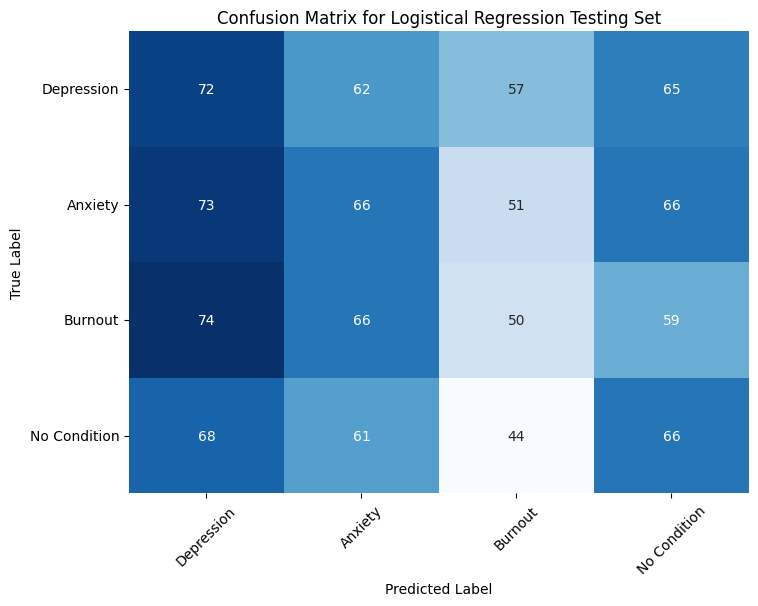

In [19]:
# Regularized Logistic Regression with Cross-Validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

log_reg_model = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)  # L2 regularization
log_reg_model.fit(X_train, y_train)
y_pred_test = log_reg_model.predict(X_test)
y_pred_train = log_reg_model.predict(X_train)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg_cv_scores = cross_val_score(log_reg_model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Logistic Regression CV Accuracy: {log_reg_cv_scores.mean():.4f}")

print("Logistical Regression Training Set Evaluation")
print(classification_report(y_train, y_pred_train, target_names=['Depression', 'Anxiety', 'Burnout', 'No Condition']))
plot_confusion_matrix(y_train, y_pred_train, title='Confusion Matrix for Logistical Regression Training Set')

print("Logistical Regression Testing Set Evaluation")
print(classification_report(y_test, y_pred_test, target_names=['Depression', 'Anxiety', 'Burnout', 'No Condition']))
plot_confusion_matrix(y_test, y_pred_test, title='Confusion Matrix for Logistical Regression Testing Set')

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Evaluate Random Forest Model
y_pred_rf = rf_model.predict(X_train)
print(f"Random Forest Training Accuracy: {rf_model.score(X_train, y_train):.4f}")
print(classification_report(y_train, y_pred_rf))

# SMOTE to Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Re-evaluate Random Forest on Resampled Data
rf_model_resampled = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = rf_model_resampled.predict(X_train_resampled)
print(f"Random Forest Resampled Training Accuracy: {rf_model_resampled.score(X_train_resampled, y_train_resampled):.4f}")
print(classification_report(y_train_resampled, y_pred_resampled))

# Final Evaluation on Test Set
X_test_scaled = scaler.transform(X_test)  # Scale test data using the same scaler
y_pred_test = rf_model_resampled.predict(X_test_scaled)

print(f"Test Accuracy: {rf_model_resampled.score(X_test_scaled, y_test):.4f}")
print(classification_report(y_test, y_pred_test))

Random Forest Training Accuracy: 0.9835
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1022
           1       0.99      0.98      0.98      1024
           2       0.98      0.98      0.98       997
           3       0.99      0.98      0.99       957

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

Random Forest Resampled Training Accuracy: 0.9741
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1024
           1       0.98      0.97      0.98      1024
           2       0.98      0.98      0.98      1024
           3       0.97      0.96      0.97      1024

    accuracy                           0.97      4096
   macro avg       0.97      0.97      0.97      4096
weighted avg       0.97      0.97      0.97      4096

Test Accuracy: 0.2300
              prec

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Ensemble Methods

## Bagging

Accuracy of KNN with Bagging: 0.2540
              precision    recall  f1-score   support

           0       0.26      0.27      0.26       256
           1       0.26      0.29      0.27       256
           2       0.25      0.26      0.26       249
           3       0.24      0.20      0.22       239

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



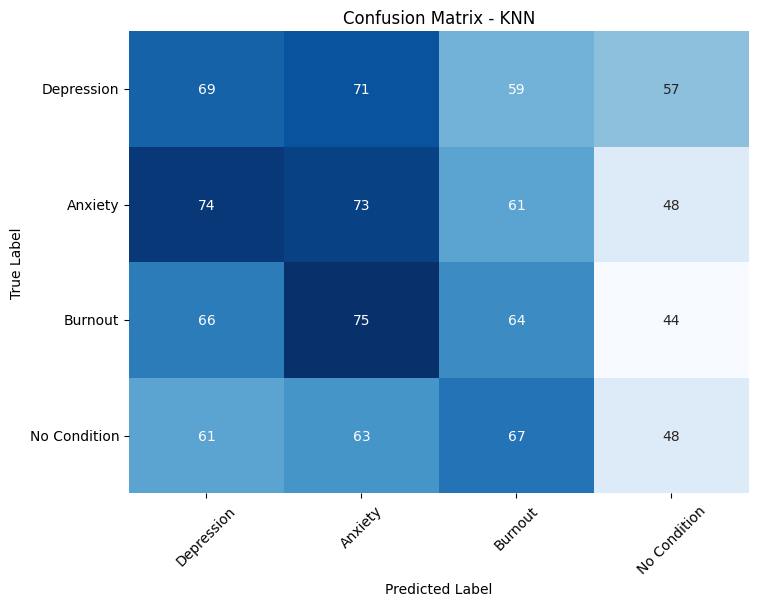

Accuracy of Logistic Regression with Bagging: 0.2520
              precision    recall  f1-score   support

           0       0.24      0.29      0.26       256
           1       0.25      0.27      0.26       256
           2       0.26      0.18      0.21       249
           3       0.27      0.27      0.27       239

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



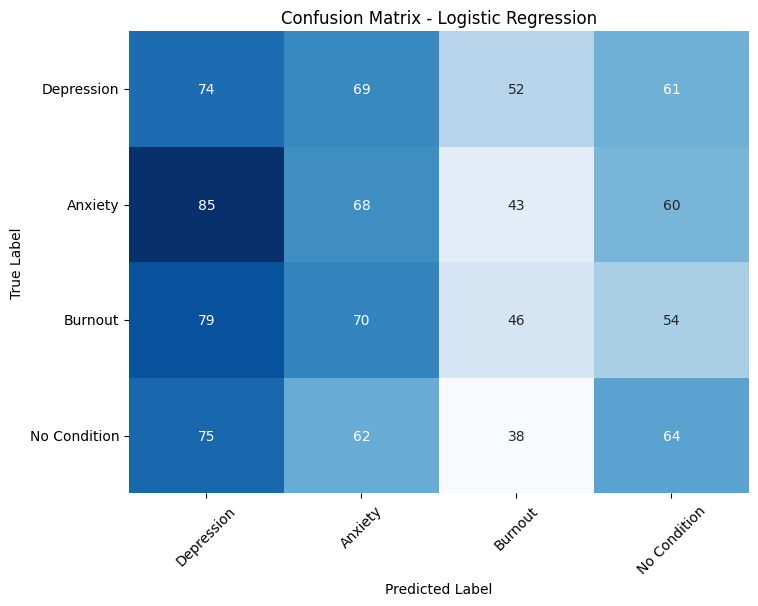

Accuracy of Random Forest with Bagging: 0.2480
              precision    recall  f1-score   support

           0       0.23      0.27      0.25       256
           1       0.26      0.29      0.27       256
           2       0.29      0.23      0.25       249
           3       0.23      0.20      0.21       239

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



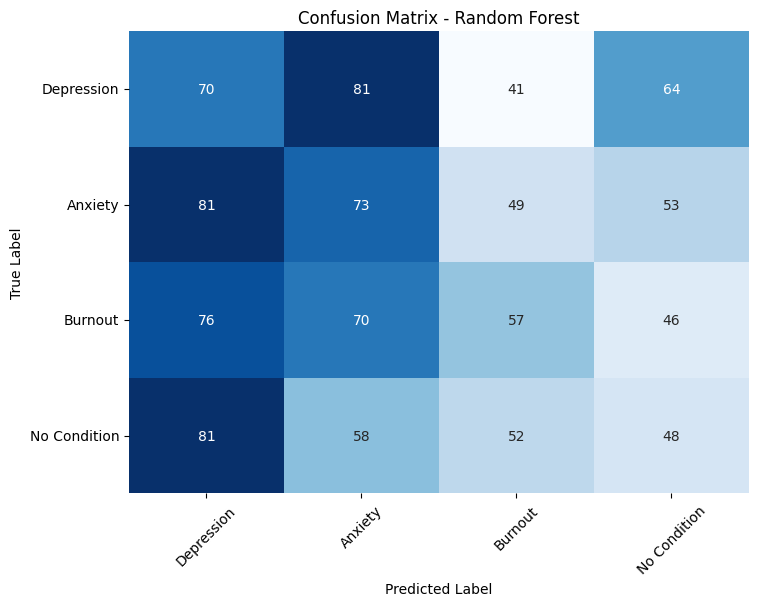

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimiza

Accuracy of Neural Network with Bagging: 0.2360
              precision    recall  f1-score   support

           0       0.23      0.27      0.25       256
           1       0.23      0.25      0.24       256
           2       0.27      0.23      0.25       249
           3       0.22      0.20      0.21       239

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.24      1000
weighted avg       0.24      0.24      0.24      1000



c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


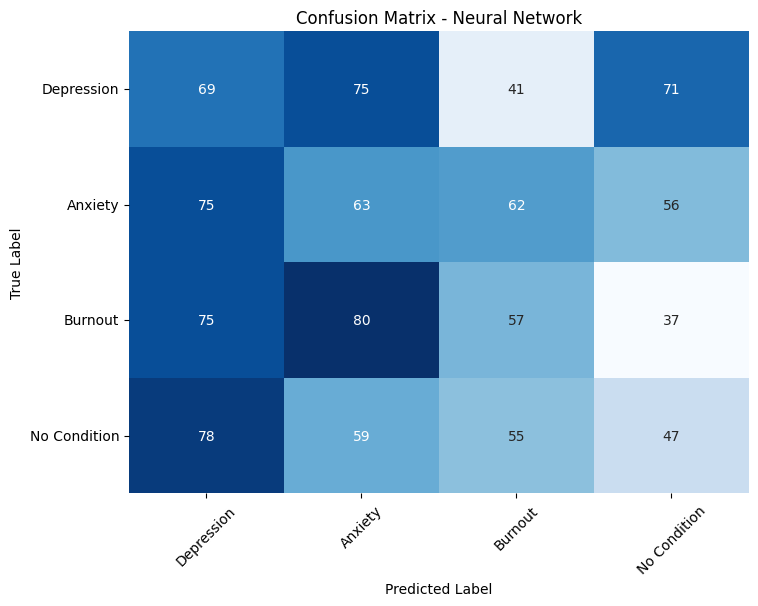

Accuracy of SVM with Bagging: 0.2440
              precision    recall  f1-score   support

           0       0.25      0.41      0.31       256
           1       0.24      0.24      0.24       256
           2       0.18      0.08      0.11       249
           3       0.28      0.25      0.26       239

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.23      1000
weighted avg       0.24      0.24      0.23      1000



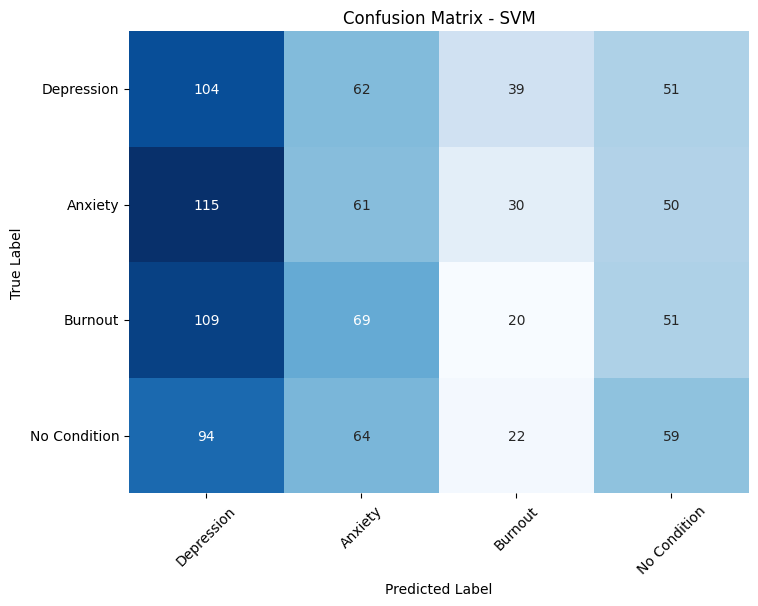

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define base models for bagging
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree'),
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l2', C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced'),
    'Neural Network': MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(40, 40), learning_rate='constant', solver='adam', max_iter=1000),
    'SVM': SVC(C=10, decision_function_shape='ovo', kernel='linear')
}

# Train each model with Bagging
for model_name, model in models.items():
    # Define Bagging Classifier with the base model
    bagging_model = BaggingClassifier(estimator=model, n_estimators=10, random_state=42)
    
    # Fit the model
    bagging_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_predBagging = bagging_model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_predBagging)
    print(f"Accuracy of {model_name} with Bagging: {accuracy:.4f}")
    print(classification_report(y_test, y_predBagging, zero_division=0))
    plot_confusion_matrix(y_true=y_test, y_pred=y_predBagging, title= f"Confusion Matrix - {model_name}")

## Boosting


Skipping Boosting with: KNN, model does not support sample weights which is required in AdaBoost

Boosting with Base Model: Logistic Regression
Accuracy of Logistic Regression with AdaBoost: 0.2410
              precision    recall  f1-score   support

           0       0.23      0.25      0.24       256
           1       0.26      0.27      0.26       256
           2       0.22      0.19      0.20       249
           3       0.25      0.26      0.25       239

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.24      1000
weighted avg       0.24      0.24      0.24      1000



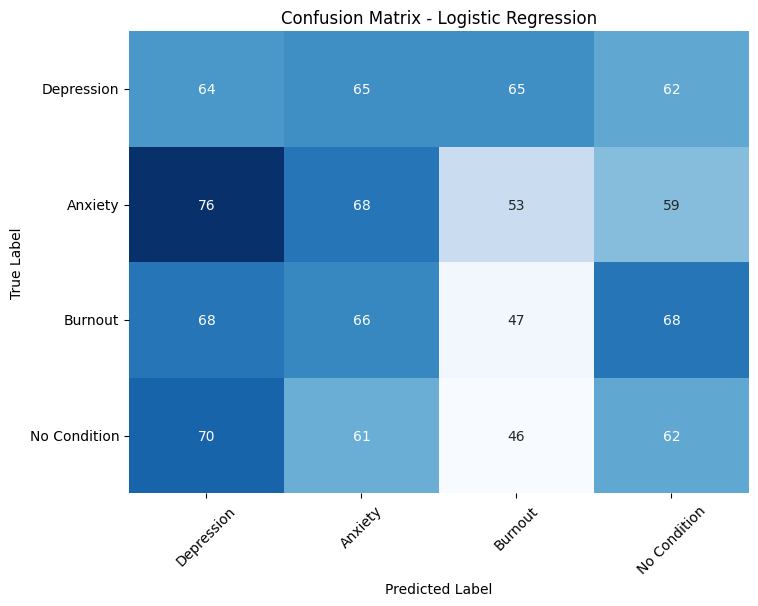


Boosting with Base Model: Random Forest
Accuracy of Random Forest with AdaBoost: 0.2780
              precision    recall  f1-score   support

           0       0.25      0.29      0.27       256
           1       0.27      0.31      0.29       256
           2       0.33      0.30      0.32       249
           3       0.27      0.21      0.23       239

    accuracy                           0.28      1000
   macro avg       0.28      0.28      0.28      1000
weighted avg       0.28      0.28      0.28      1000



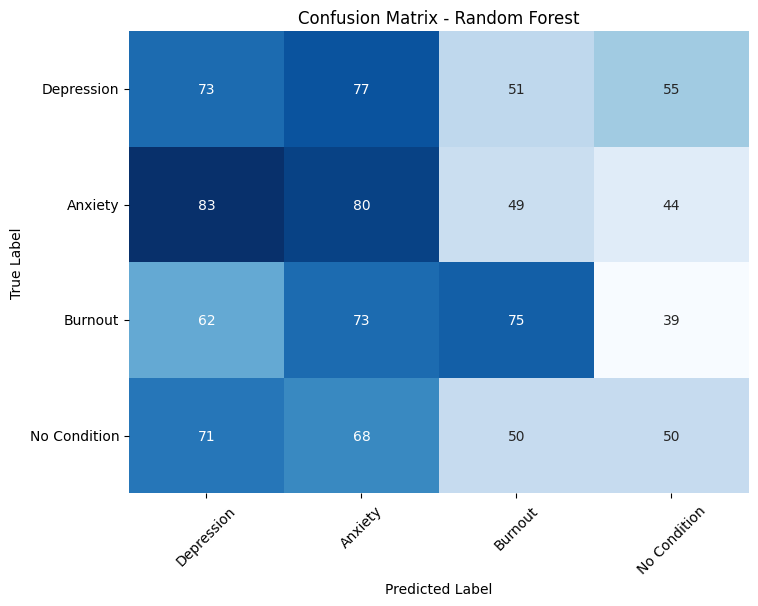


Skipping Boosting with: Neural Network, model does not support sample weights which is required in AdaBoost

Boosting with Base Model: SVM
Accuracy of SVM with AdaBoost: 0.2460
              precision    recall  f1-score   support

           0       0.26      0.05      0.08       256
           1       0.25      0.86      0.39       256
           2       0.21      0.06      0.09       249
           3       0.00      0.00      0.00       239

    accuracy                           0.25      1000
   macro avg       0.18      0.24      0.14      1000
weighted avg       0.18      0.25      0.14      1000



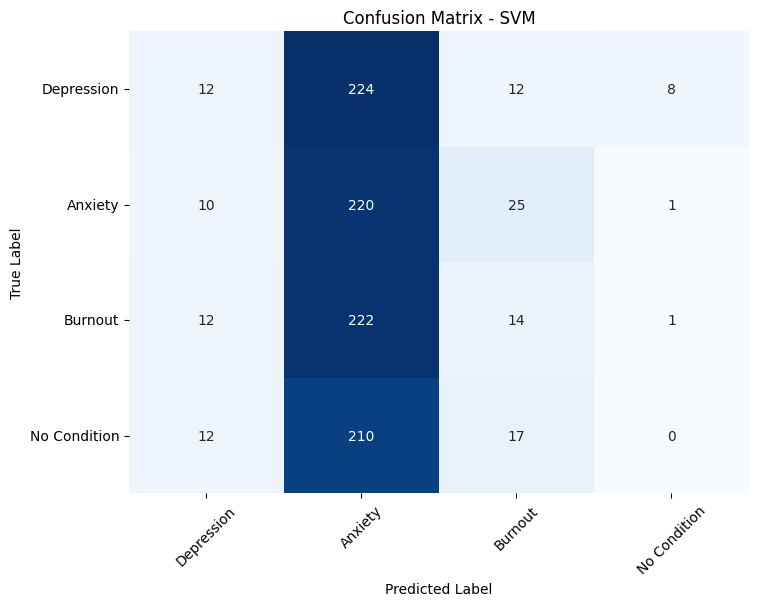

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.base import clone

for model_name, base_model in models.items():
    if model_name == "KNN" or model_name == "Neural Network":
        print(f"\nSkipping Boosting with: {model_name}, model does not support sample weights which is required in AdaBoost")
        continue
    
    print(f"\nBoosting with Base Model: {model_name}")

    # Clone  model for fresh state
    base_model_clone = clone(base_model)

    # Create an AdaBoost classifier using the base model
    adaboost_model = AdaBoostClassifier(
        estimator=base_model_clone, 
        n_estimators=50,  # boosting rounds
        learning_rate=1.0,  # contribution of each model
        random_state=42,
        algorithm='SAMME'
    )

    # Train boosted model
    adaboost_model.fit(X_train, y_train)

    # Predict on the test set
    y_predBoosting = adaboost_model.predict(X_test)

    # Evaluate the boosted model
    accuracy = accuracy_score(y_test, y_predBoosting)
    print(f"Accuracy of {model_name} with AdaBoost: {accuracy:.4f}")
    print(classification_report(y_test, y_predBoosting, zero_division=0))
    plot_confusion_matrix(y_true=y_test, y_pred=y_predBoosting, title= f"Confusion Matrix - {model_name}")

## Stacking

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimiza

Stacking Ensemble with Logistic Regression as Meta-Learner Accuracy: 0.2800
              precision    recall  f1-score   support

           0       0.29      0.25      0.26       256
           1       0.29      0.27      0.28       256
           2       0.28      0.32      0.30       249
           3       0.27      0.29      0.28       239

    accuracy                           0.28      1000
   macro avg       0.28      0.28      0.28      1000
weighted avg       0.28      0.28      0.28      1000



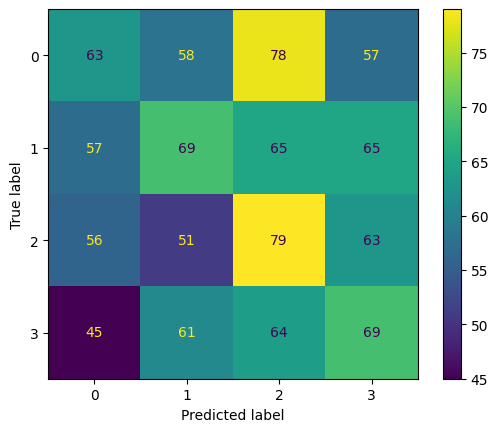

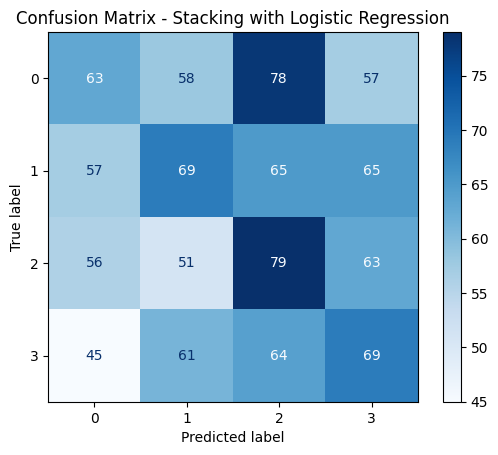

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimiza

Stacking Ensemble with Random Forest as Meta-Learner Accuracy: 0.2480
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       256
           1       0.27      0.24      0.26       256
           2       0.25      0.31      0.27       249
           3       0.27      0.24      0.25       239

    accuracy                           0.25      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.25      0.25      0.25      1000



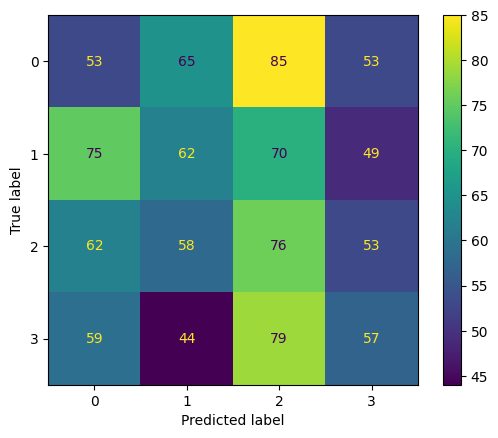

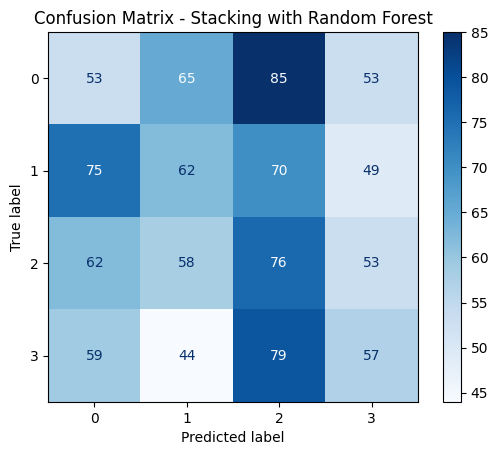

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimiza

Stacking Ensemble with SVM as Meta-Learner Accuracy: 0.2710
              precision    recall  f1-score   support

           0       0.25      0.16      0.19       256
           1       0.29      0.32      0.30       256
           2       0.28      0.29      0.29       249
           3       0.26      0.31      0.29       239

    accuracy                           0.27      1000
   macro avg       0.27      0.27      0.27      1000
weighted avg       0.27      0.27      0.27      1000



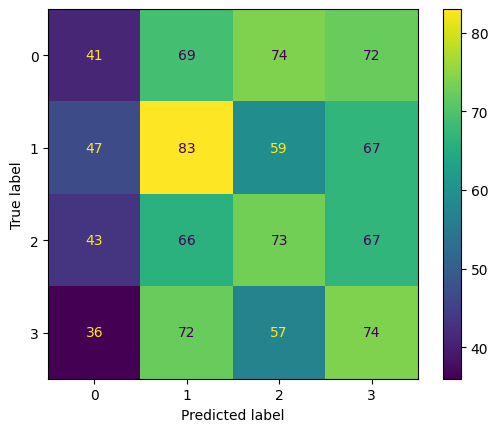

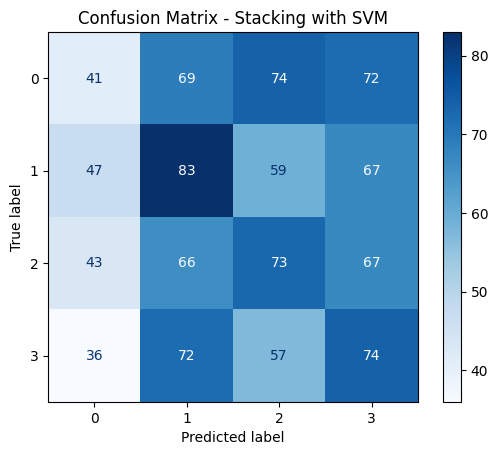

c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\17272\anaconda3\envs\IntroToMachineLearning\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimiza

Stacking Ensemble with Neural Network as Meta-Learner Accuracy: 0.2390
              precision    recall  f1-score   support

           0       0.24      0.17      0.20       256
           1       0.25      0.44      0.32       256
           2       0.22      0.20      0.21       249
           3       0.23      0.14      0.18       239

    accuracy                           0.24      1000
   macro avg       0.24      0.24      0.23      1000
weighted avg       0.24      0.24      0.23      1000



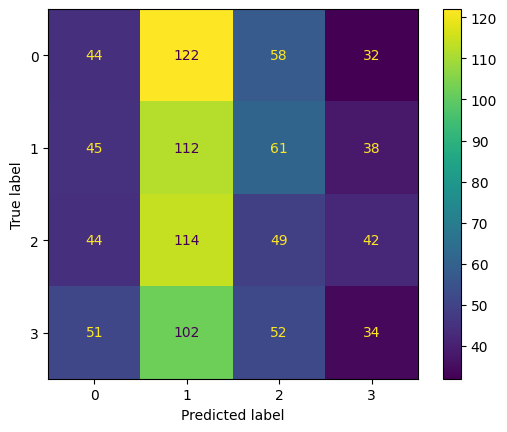

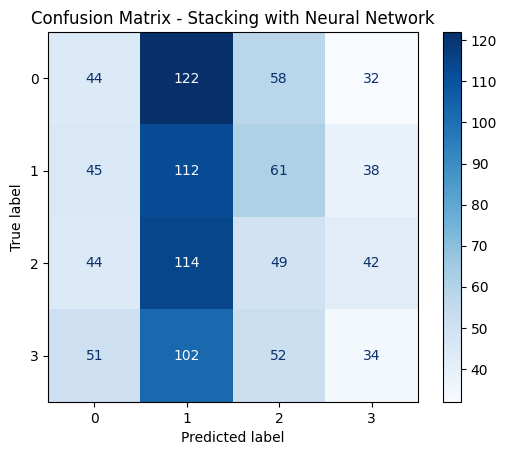

In [24]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Define base learners
knn = KNeighborsClassifier(n_neighbors=5)
logistic = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
svm = SVC(C=10, decision_function_shape='ovo', kernel='linear')
neural_network = MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(40, 40),
                               learning_rate='constant', solver='adam', max_iter=1000)

# Define a list of meta-learners
meta_learners = {
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l2', C=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced'),
    'SVM': SVC(C=10, decision_function_shape='ovo', kernel='linear'),
    'Neural Network': MLPClassifier(activation='tanh', alpha=0.1, hidden_layer_sizes=(40, 40),
                                    learning_rate='constant', solver='adam', max_iter=1000)
}

# Combine base learners into stacking classifiers with different meta-learners
for meta_name, meta_learner in meta_learners.items():
    # Combine the base learners into a stacking classifier
    stacking_model = StackingClassifier(
        estimators=[
            ('knn', knn),
            ('logistic', logistic),
            ('random_forest', random_forest),
            ('svm', svm),
            ('neural_network', neural_network)
        ],
        final_estimator=meta_learner,
        cv=5  # Cross-validation for stacking
    )

    # Train the stacking model
    stacking_model.fit(X_train, y_train)

    # Make predictions
    y_predStack = stacking_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_predStack)
    print(f"Stacking Ensemble with {meta_name} as Meta-Learner Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_predStack))

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(
        stacking_model, 
        X_test, 
        y_test,
        display_labels=stacking_model.classes_
    )
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - Stacking with {meta_name}")
    plt.show()

## Conclusions
## There is no significant coorelation between remote work and mental health
## Simpler models are underfitting and more complex models are overfitting
## Data may be synthetic, may explain why we are failing to capture a proper coorrelation